# QSAR Aquatic Toxicity Prediction 

## **Data Preparation**

Import libraries

In [8]:
from pandas import read_csv
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

In [9]:
#Looks like the data dont have header, reload it with header
data = read_csv("./qsar_aquatic_toxicity.csv", sep=";", 
                   names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response[LC-50]']) 
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response[LC-50]
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


**Data information and characteristics**

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TPSA                          546 non-null    float64
 1   SAacc                         546 non-null    float64
 2   H-050                         546 non-null    int64  
 3   MLOGP                         546 non-null    float64
 4   RDCHI                         546 non-null    float64
 5   GATS1p                        546 non-null    float64
 6   nN                            546 non-null    int64  
 7   C-040                         546 non-null    int64  
 8   quantitative response[LC-50]  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response[LC-50]
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


In [11]:
corr_mat = data.corr(method='pearson')
corr_mat

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response[LC-50]
TPSA,1.000000,0.859633,0.658701,-0.457921,0.524282,0.172631,0.612376,0.410065,0.037984
SAacc,0.859633,1.000000,0.771259,-0.403166,0.571916,0.209980,0.500374,0.450060,-0.097967
H-050,0.658701,0.771259,1.000000,-0.491507,0.284878,0.061080,0.473903,0.154575,-0.189121
MLOGP,-0.457921,-0.403166,-0.491507,1.000000,0.327002,-0.380280,-0.290784,-0.100971,0.535512
RDCHI,0.524282,0.571916,0.284878,0.327002,1.000000,0.049991,0.342768,0.411293,0.390621
GATS1p,0.172631,0.209980,0.061080,-0.380280,0.049991,1.000000,0.070317,0.143258,-0.311821
nN,0.612376,0.500374,0.473903,-0.290784,0.342768,0.070317,1.000000,0.290193,-0.070179
C-040,0.410065,0.450060,0.154575,-0.100971,0.411293,0.143258,0.290193,1.000000,0.024310
quantitative response[LC-50],0.037984,-0.097967,-0.189121,0.535512,0.390621,-0.311821,-0.070179,0.024310,1.000000


<Axes: >

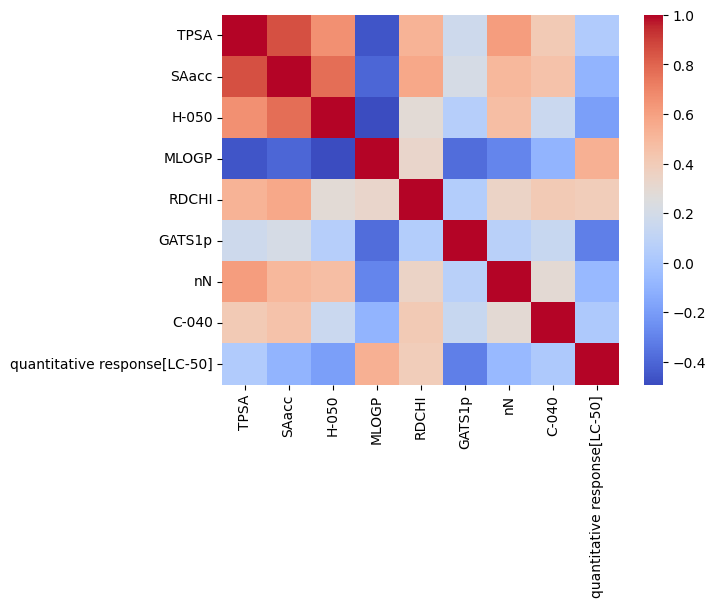

In [12]:
sns.heatmap(data=corr_mat,cmap='coolwarm')

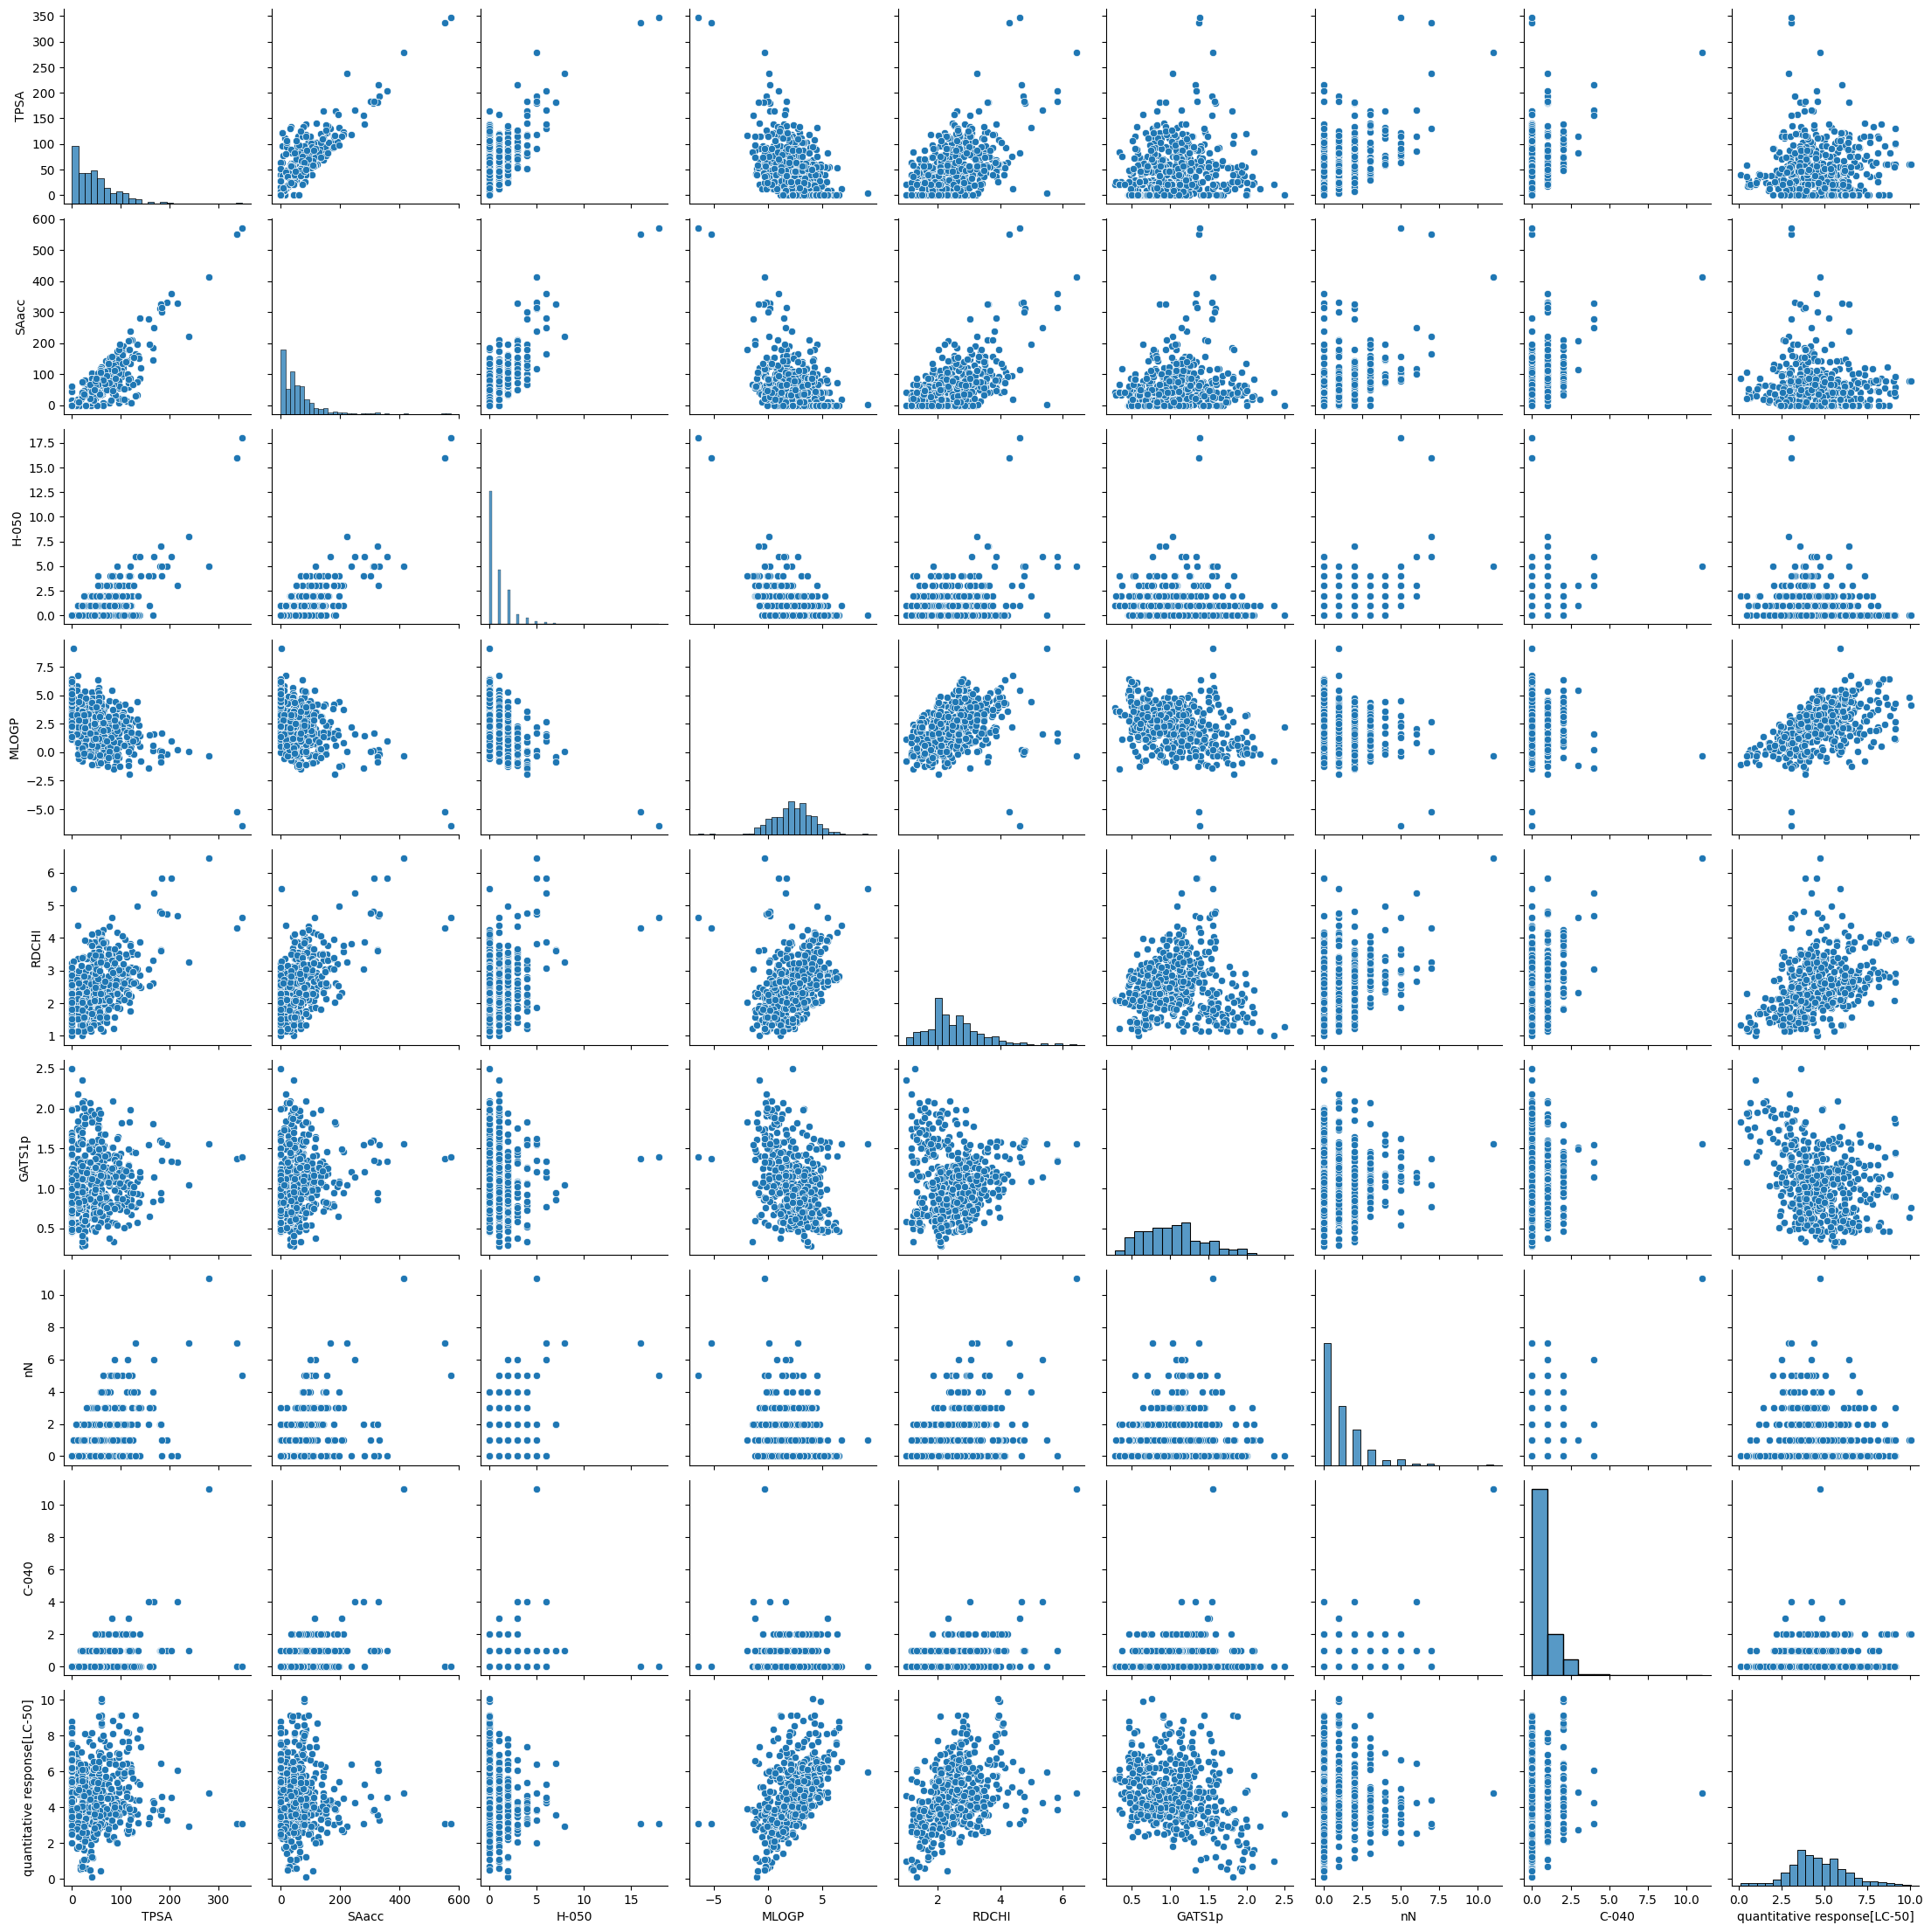

In [13]:
sns.pairplot(data=data)

<Axes: xlabel='C-040', ylabel='quantitative response[LC-50]'>

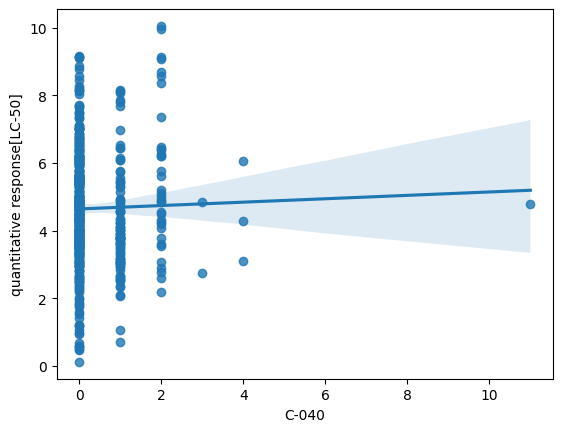

In [14]:
sns.regplot(x=data['C-040'],y=data['quantitative response[LC-50]'])

<Axes: xlabel='MLOGP', ylabel='quantitative response[LC-50]'>

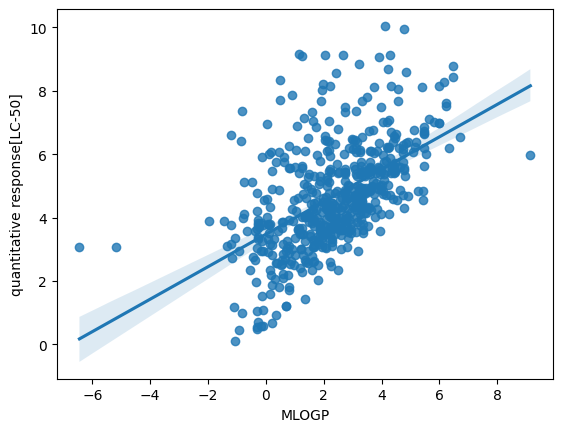

In [16]:
sns.regplot(x=data['MLOGP'],y=data['quantitative response[LC-50]'])

##

abc

In [17]:
data.isnull()

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response[LC-50]
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
541,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False
544,False,False,False,False,False,False,False,False,False


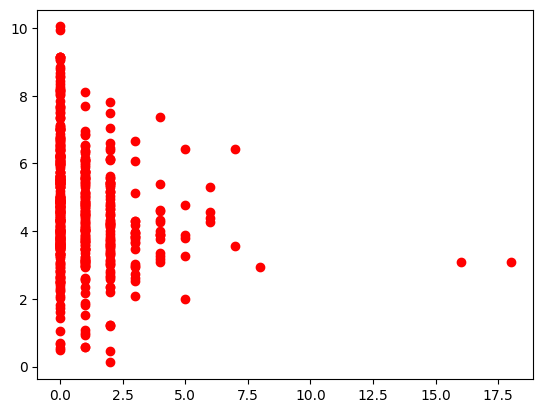

In [18]:
sp1 = plt.scatter(data['H-050'],data['quantitative response[LC-50]'],color='r')

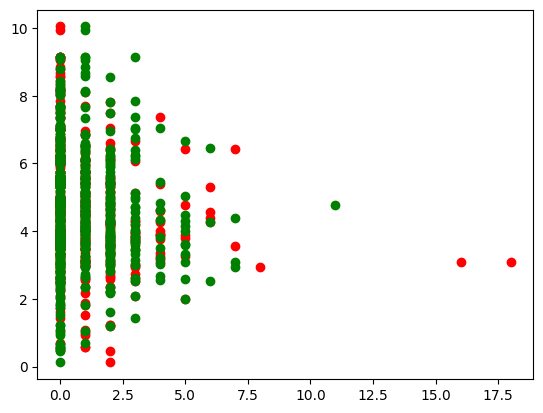

In [19]:

sp1= plt.scatter(data['H-050'],data['quantitative response[LC-50]'],color='r',label='Toxicity')
sp2 = plt.scatter(data['nN'],data['quantitative response[LC-50]'],color='g',label='Toxicity')
plt.show()

Define a function to get the columns that don’t have any missing values

In [20]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

Get the columns that do not have any missing values

In [21]:
num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')

How many column we got

In [22]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 9
Number of nun-numerical columns with no nan values : 0


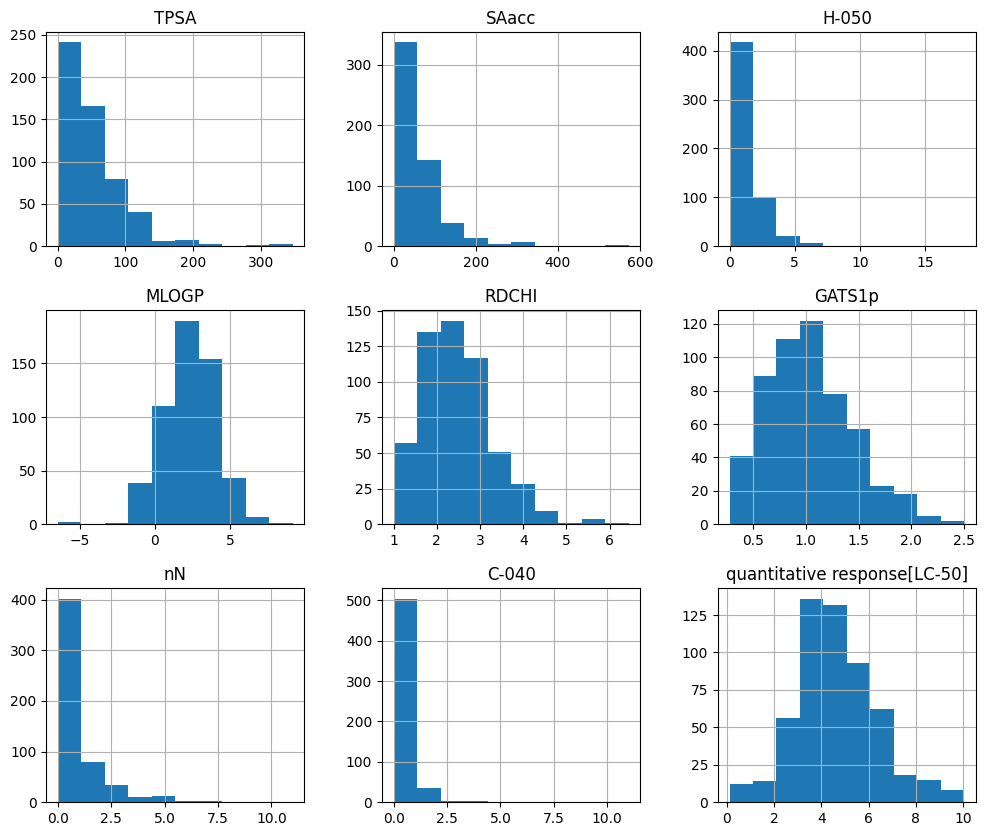

In [23]:
data= data[num_cols + cat_cols]
data.hist(figsize = (12,10))
plt.show()

## Split data

75% of data for data training and 25% of data for data testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response[LC-50]'),
                                                   data['quantitative response[LC-50]'],
                                                   test_size=0.25)
print("Train: ", len(X_train))
print("Test: ", len(X_test))

Train:  409
Test:  137


## Train and test the models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import numpy as np

mlr=LinearRegression()
mlr.fit(X_train,y_train)


LinearRegression()

In [26]:

mlr_train_rscore=mlr.score(X_train,y_train)
mlr_train_pred=mlr.predict(X_train)
mlr_train_rmse=np.sqrt(mean_squared_error(y_train,mlr_train_pred))

In [27]:
print("R squared for Training data: ", mlr_train_rscore)
print("Root Mean Squared Error for Training data: ", mlr_train_rmse)

R squared for Training data:  0.4709865489219617
Root Mean Squared Error for Training data:  1.2152120861223414


In [28]:
mlr_test_rscore=mlr.score(X_test,y_test)
mlr_test_pred=mlr.predict(X_test)
mlr_test_rmse=np.sqrt(mean_squared_error(y_test,mlr_test_pred))
mlr_test_mae=mean_absolute_error(y_test,mlr_test_pred)

In [29]:
print("R squared for Testing data: ", mlr_test_rscore)
print("Root Mean Squared Error for Testing data: ", mlr_test_rmse)
print("Mean Absolute Error for Testing data: ", mlr_test_mae)

R squared for Testing data:  0.5273895673524382
Root Mean Squared Error for Testing data:  1.1266566525794544
Mean Absolute Error for Testing data:  0.881681157119284


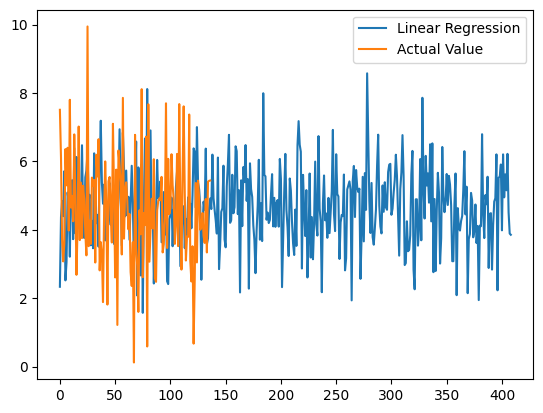

In [30]:
plt.plot(list(mlr_train_pred), label='Linear Regression')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

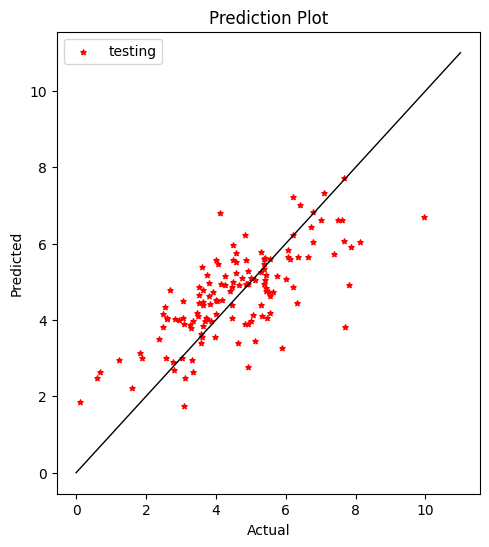

In [31]:
fig=plt.figure(figsize=(12,6))
y=data.iloc[:,6].values
ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, mlr_train_pred, s=15, label='training')
ax1.scatter(y_test, mlr_test_pred, marker='*', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()


In [33]:
from sklearn.linear_model import BayesianRidge

Bayesian=BayesianRidge(n_iter=5000).fit(X_train,y_train)

Bayesian_train_rscore=Bayesian.score(X_train,y_train)
Bayesian_train_pred=Bayesian.predict(X_train)
Bayesian_train_rmse=np.sqrt(mean_squared_error(y_train,Bayesian_train_pred))

print("R squared for Training data: ",Bayesian_train_rscore)
print("Root Mean Squared Error for Training data: ", Bayesian_train_rmse)

Bayesian_test_rscore=Bayesian.score(X_test,y_test)

Bayesian_test_pred=Bayesian.predict(X_test)

Bayesian_test_rmse=np.sqrt(mean_squared_error(y_test,Bayesian_test_pred))
Bayesian_test_mae=mean_absolute_error(y_test,Bayesian_test_pred)

print("R squared for Testing data: ",Bayesian_test_rscore)
print("Root Mean Squared Error for Testing data: ", Bayesian_test_rmse)
print("Mean Absolute Error for Testing data: ", Bayesian_test_mae)

R squared for Training data:  0.469675821549307
Root Mean Squared Error for Training data:  1.2167166096288284
R squared for Testing data:  0.5251412698415034
Root Mean Squared Error for Testing data:  1.1293333327332638
Mean Absolute Error for Testing data:  0.8858384149219838


# Building the model

For this dataset , to explore possibilities of using different model architecture, using 2x 32, and 2x 64 hidden layer


In [34]:
#building the model

def select_model(num, x):
  if num == 1:
    model = tf.keras.Sequential([
                              tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=[len(x.columns)]),
                              tf.keras.layers.Dense(8, activation=tf.nn.relu),
                              tf.keras.layers.Dense(8, activation=tf.nn.relu),
                              tf.keras.layers.Dense(1)
    ])
  
  return model

In [36]:
import tensorflow as tf

model_1 = select_model(1, X_train)

model_1.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist_1 = model_1.fit(X_train, y_train,
                  epochs=200, validation_split = 0.2, 
                  verbose=2)

Epoch 1/200
11/11 - 1s - loss: 22.7621 - mae: 3.6198 - mse: 22.7621 - val_loss: 9.6224 - val_mae: 2.5111 - val_mse: 9.6224 - 1s/epoch - 115ms/step
Epoch 2/200
11/11 - 0s - loss: 13.1589 - mae: 3.0870 - mse: 13.1589 - val_loss: 10.6588 - val_mae: 2.7964 - val_mse: 10.6588 - 56ms/epoch - 5ms/step
Epoch 3/200
11/11 - 0s - loss: 12.4395 - mae: 3.0035 - mse: 12.4395 - val_loss: 9.0756 - val_mae: 2.4709 - val_mse: 9.0756 - 51ms/epoch - 5ms/step
Epoch 4/200
11/11 - 0s - loss: 11.6513 - mae: 2.8564 - mse: 11.6513 - val_loss: 8.3168 - val_mae: 2.3704 - val_mse: 8.3168 - 50ms/epoch - 5ms/step
Epoch 5/200
11/11 - 0s - loss: 11.0961 - mae: 2.7827 - mse: 11.0961 - val_loss: 8.3195 - val_mae: 2.3777 - val_mse: 8.3195 - 51ms/epoch - 5ms/step
Epoch 6/200
11/11 - 0s - loss: 10.7122 - mae: 2.7488 - mse: 10.7122 - val_loss: 8.1397 - val_mae: 2.3634 - val_mse: 8.1397 - 52ms/epoch - 5ms/step
Epoch 7/200
11/11 - 0s - loss: 10.2009 - mae: 2.6637 - mse: 10.2009 - val_loss: 7.6573 - val_mae: 2.3002 - val_mse: 

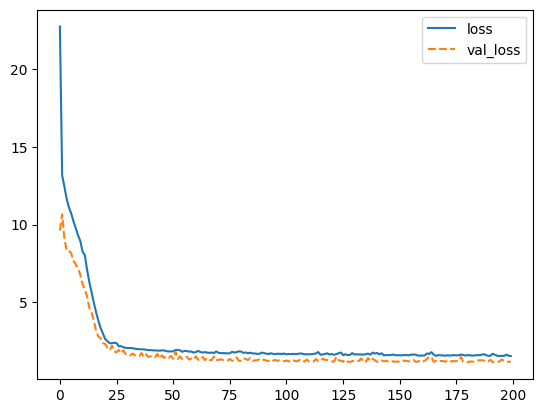

In [39]:
import pandas as pd
hist = pd.DataFrame(hist_1.history)
hist['epoch'] = hist_1.epoch

plt.plot(hist['epoch'], hist['loss'], label='loss')
plt.plot(hist['epoch'], hist['val_loss'], ls='dashed', label='val_loss')
plt.legend(loc='upper right')
plt.show()

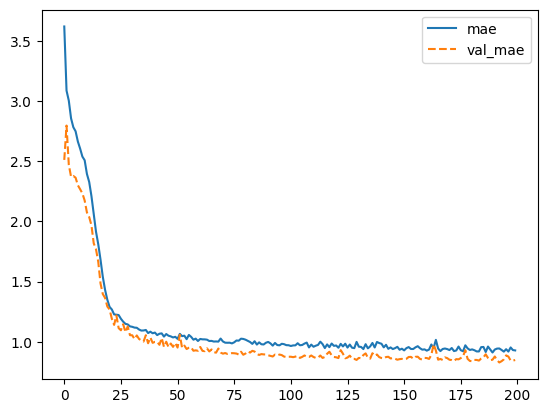

In [40]:
plt.plot(hist['epoch'], hist['mae'], label='mae')
plt.plot(hist['epoch'], hist['val_mae'], ls='dashed', label='val_mae')
plt.legend(loc='upper right')
plt.show()

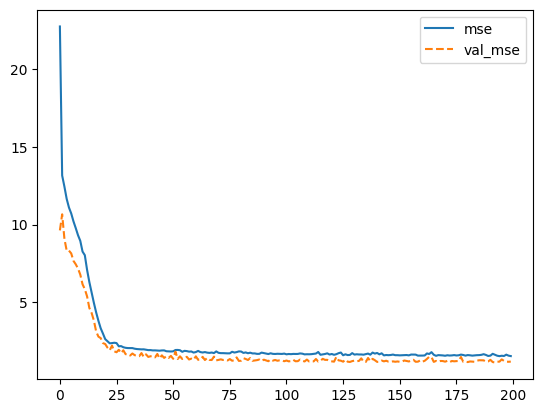

In [41]:
plt.plot(hist['epoch'], hist['mse'], label='mse')
plt.plot(hist['epoch'], hist['val_mse'], ls='dashed', label='val_mse')
plt.legend(loc='upper right')
plt.show()

In [42]:
loss_1, mae_1, mse_1 = model_1.evaluate(X_test, y_test, verbose=2)
print(f"MSE: {mse_1}\nMAE: {mae_1}")

5/5 - 0s - loss: 1.3914 - mae: 0.9143 - mse: 1.3914 - 57ms/epoch - 11ms/step
MSE: 1.3914282321929932
MAE: 0.9143458604812622


5/5 [==============================] - 0s 2ms/step


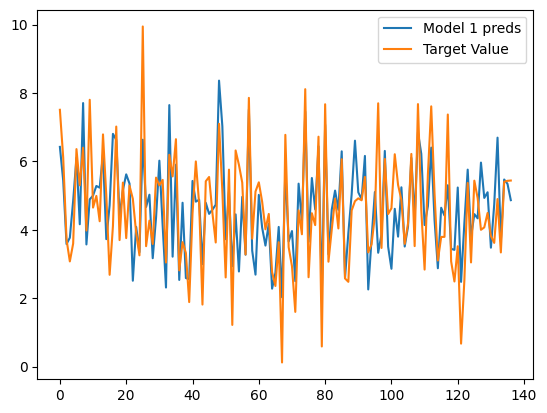

In [43]:
preds = model_1.predict(X_test)

plt.plot(list(preds), label='Model 1 preds')
plt.plot(list(y_test), label='Target Value')

plt.legend(loc="upper right")

In [44]:
model_1.save("/content/drive/My Drive/aquatic toxicity/model-v1.hdf5")